# 20 - Plug-and-Play Estimators
 
1부에서 `treatment`가 비무작위일 때 `confounder`(교란자)에 의한 편향을 없애는 방법을 공부했습니다. 편향을 없애는 작업은 인과추론에서 `identification problem`(식별 문제)을 해결하는 데 도움을 줍니다. 처치군과 통제군에 속한`unit`을 서로 교환하여도 반사실적 결과가 같으면, (수식으로 표현하면) ($Y(0),Y(1) \perp X$)와 같을 때 처치 효과를 구할 수 있습니다. 아직 더 살펴볼 것이 더 남아있어요.

`Identification`(식별)은 평균적인 처치 효과를 찾을 수 있다는 의미입니다. 평균에 대한 처치 효과를 의미하기도 합니다. `ATE`(`Average treatment effect`, 평균 처치 효과)는 처치를 적용해야 하는지 결정하는 문제에 유용합니다. 이제 우리는 `ATE` 이상을 원합니다. 처치에 더 민감한 그룹이 있는지 알고 싶습니다. 더 민감한 사람에게만 처치를 적용하는 효율적인 정책을 만들 수 있기 때문입니다.
 
## Problem Setup
 
목표를 상기해 봅시다. 주어진 `potential outcome`(잠재 결과)에 대한 `individual treatment effect`(`ITE`, 개별 처치 효과)는 `potential outcome` 간 거리로 정의됩니다.

$
\tau_i = Y_i(1) − Y_i(0),
$
 
연속형 처치라면 $\tau_i = \partial Y(t)$입니다. 물론 전체 잠재 결과 중 일부만 확인할 수 있으므로 `ITE`를 구할 방법은 없습니다.

$
Y^{obs}_i(t)= 
\begin{cases}
Y_i(1), & \text{if } t=1\\
Y_i(0), & \text{if } t=0
\end{cases}
$
 
`ATE`는 아래와 같습니다.

$
\tau = E[Y_i(1) − Y_i(0)] = E[\tau_i]
$
 
`CATE`(`Conditional average treatment effect`, 조건부 평균 처치 효과)는 다음과 같습니다.
 
$
\tau(x) = E[Y_i(1) − Y_i(0)|X] = E[\tau_i|X]
$
 
1부에서는 `ATE`를 구하는 데 중점을 두었습니다. 이제 `CATE`를 공부해 봅시다. `CATE`는 의사 결정을 개인화하는 데 유용합니다. 예를 들어 신약에 대해 어떤 유형의 환자에 효과가 좋은지 (`CATE`$>0$) 어떤 환자에 악영향을 주는지 (`CATE`$<0$) 알고 싶습니다.

`treatment` $T$와 `feature` $X$ 간 교호작용을 고려하면 선형 회귀로 `CATE`를 추정할 수 있습니다.

$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + \beta_3 t_i X_i + e_i.
$

모델의 매개 변수로 `CATE`인 $\tau(x)$를 얻을 수 있습니다.

$
\hat{\tau}(x) = \hat{\beta}_1 + \hat{\beta}_3 X_i
$
 
선형 회귀는 몇 가지 단점이 있어요. 먼저 `Y`와 $X$가 선형 관계임을 가정합니다. 만약 선형이 아니라면 매개 변수인 $\beta_1$, $\beta_3$에 대한 추정치가 빗나갑니다. 또한, $\beta_2$를 전혀 신경 쓰고 있지 않습니다. 
 
선형 회귀를 유연한 기계학습 모델로 대체하면 문제를 해결할 수 있을까요? $T$를 `boosted tree`나 신경망과 같은 기계학습 모델의 `feature`로 넣어 볼 수 있습니다.

$
y_i = M(X_i, T_i) + e_i
$

하지만 이 방법은 $\hat{\tau(x)}$ 보다 $\hat{y}$를 예측하는 것이 목적이므로 처치 효과 추정치를 얻는 방법이 명확하지 않습니다. `outcome`에 대한 `MSE`인 $E[(Y_i - \hat{Y}_i)^2]$ 보다는 $E[(\tau(x)_i - \hat{\tau}(x)_i)^2] = E[(Y_i(1) - Y_i(0) - \hat{\tau}(x)_i)^2]$를 최적화하는 것이 이상적입니다.
 
물론 $\tau(x)$는 측정할 수 없는 값이므로 이를 최적화하는 것은 불가능합니다. 난처한 상황이네요... 간접적인 방법을 생각해 봅시다.

<figure>
    <img src="data/img/plug-and-play-estimators/infeasible.png">
    <figcaption>와. 쓸모없네.</figcaption>
</figure>

## Target Transformation
 
`binary treatment`(이진 처리) 문제를 고려해 봅시다. 이메일의 효과를 알고 싶은 투자 한 회사가 있습니다. 회사의 경영진은 이메일을 통해 고객이 더 많은 금액을 투자하게 만들고 싶습니다. 효과를 확인하기 위해 고객의 $50$%에만 이메일을 보내는 A/B테스트를 수행합니다.

다소 엉뚱하지만 $Y$와 $T$를 곱해봅시다.

$
Y^*_i = 2 Y_i * T_i - 2 Y_i*(1-T_i)
$ 
 
$T=1$이면 $Y$에 $2$를 곱합니다. $T=0$이면 $Y$에 $-2$를 곱합니다. 예를 들어 고객이 $2000$원 투자했다면 이메일을 받았을 때 변환값은 $4000$원이 됩니다. 이메일을 받지 못했다면 $-4000$원 입니다.
 
이메일의 효과가 음수인 것은 이상해 보입니다만 더 진행해 봅시다. 약간의 계산으로 이러한 변환이 처치 효과가 됨을 도출할 수 있습니다. 정말 놀랍지 않나요? 엉뚱한 변환으로 측정할 수 없는 값을 추정할 수 있게 되었습니다.

이해하려면 수학이 약간 필요해요. $T$는 무작위이므로 $T$와 $Y$는 독립$(T \perp Y (1))$ 입니다. 즉, $E[T, Y(t)]=E[T]*E[Y(t)]$입니다.

$Y_i*T_i = Y(1)_i*T_i$, $Y_i*(1-T_i) = Y(0)_i*(1-T_i)$라고 해봅시다. $Y^*_i$의 기대값을 계산해보겠습니다.

$
\begin{align}
E[Y^*_i|X_i=x] &= E[2 Y(1)_i * T_i - 2 Y(0)_i*(1-T_i)|X_i=x] \\
&= 2E[Y(1)_i * T_i | X_i=x] - 2E[Y(0)_i*(1-T_i)|X_i=x]\\
&= 2E[Y(1)_i| X_i=x] * E[ T_i | X_i=x] - 2E[Y(0)_i| X_i=x]*E[(1-T_i)|X_i=x] \\
&= 2E[Y(1)_i| X_i=x] * 0.5 - 2E[Y(0)_i| X_i=x]*0.5 \\ 
&= E[Y(1)_i| X_i=x] - E[Y(0)_i| X_i=x] \\
&= \tau(x)_i
\end{align}
$
 
이 엉뚱한 아이디어는 `individual treatment effect`(`ITE`) $\tau(x)_i$에 대한 편향 없는 추정치가 되었습니다. 이제 최적화 기준을 아래와 같이 대체할 수 있습니다.

$
E[(Y^*_i - \hat{\tau}(x)_i)^2]
$
 
간단히 말하자면 임의의 회귀 모델이 $Y^*_i$를 예측한다면 처치 효과도 예측할 수 있습니다.

만약 처치가 $50:50$이 아니거나, 비무작위라면 어떨까요? 너무 복잡하지는 않습니다. 첫째로 무작위 $T$가 아니더라도 조건부 독립성인 $T \perp Y(1), Y(1) | X$는 필요합니다. 즉, $X$를 통제하는 한 $T$는 충분히 무작위여야 합니다. 일반적으로 `transformed target`(변환된 목표) $Y_{i}^{*}$은 다음과 같습니다.

$
Y^*_i = Y_i * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))}
$
 
$e(X_i)$는 성향 점수를 의미합니다. 처치가 확률 $p$로 무작위 할당된다면 성향 점수를 $p$로 대체할 수 있습니다. $T$가 무작위 할당되지 않았다면 성향 점수를 사용해야 합니다.

$Y_{i}^{*}$ 기댓값은 처치 효과입니다. 증명은 숙제입니다. 농담~ 여기 있어요. 조금 어렵다면 넘어가도 괜찮습니다.

$
\begin{align}
E[Y^*_i|X_i=x] &= E\big[Y_i * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))}|X_i=x\big] \\
&= E\big[Y_i T_i * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))} + Y_i (1-T_i) * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))}|X_i=x\big]\\
&= E\big[Y(1)_i * \dfrac{T_i(1 - e(X_i))}{e(X_i)(1-e(X_i))} | X_i=x\big] - E\big[Y(0)_i * \dfrac{(1-T_i)e(X_i)}{e(X_i)(1-e(X_i))}|X_i=x\big]\\
&= \dfrac{1}{e(X_i)} E[Y(1)_i * T_i|X_i=x] - \dfrac{1}{1-e(X_i)} E[Y(0)_i * (1-T_i)| X_i=x]\\
&= \dfrac{1}{e(X_i)} E[Y(1)_i|X_i=x] * E[T_i|X_i=x] - \dfrac{1}{1-e(X_i)} E[Y(0)_i|X_i=x] * E[(1-T_i)| X_i=x]\\
&= E[Y(1)_i|X_i=x] - E[Y(0)_i|X_i=x]\\
&= \tau(x)_i
\end{align}
$
 
언제나처럼 예제를 봅시다. 목표는 투자 유치 메일에 대한 효과를 구하는 것입니다. `outcome`은 `converted`로 이진값 (`invested` 또는 `didn't invest`)입니다.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from nb21 import cumulative_gain, elast

In [2]:
email = pd.read_csv("./data/invest_email_rnd.csv")
email.head()

age   income  insurance  invested  em1  em2  em3  converted
0  44.1  5483.80    6155.29  14294.81    0    1    1          0
1  39.8  2737.92   50069.40   7468.15    1    0    0          0
2  49.0  2712.51    5707.08   5095.65    1    0    1          1
3  39.7  2326.37   15657.97   6345.20    1    1    1          0
4  35.3  2787.26   27074.44  14114.86    1    1    1          0

개인화를 목표로 해보겠습니다. 먼저 `em1`에 집중해봅시다. `em1`에 반응이 좋은 고객에게만 이메일을 보내고 싶습니다. 즉 `em1`의 `Conditional average treatment effect`(`CATE`, 조건부 평균 처치 효과)를 추정합니다.

$
E[Converted(1)_i - Converted(0)_i|X_i=x] = \tau(x)_i
$
 
`CATE`를 알게 되면 반응이 좋은 고객에 (상위 `CATE`) 효율적으로 대응할 수 있습니다.

먼저 데이터를 훈련 데이터와 검증 데이터로 나눕니다. 훈련 데이터로 $\tau(x)_i$를 얻고, 검증 데이터로 추정치를 평가합니다.

In [3]:
from sklearn.model_selection import train_test_split

np.random.seed(123)
train, test = train_test_split(email, test_size=0.4)
print(train.shape, test.shape)

(9000, 8) (6000, 8)


방금 배운 `target transformation`(목표 변환)을 적용합니다. 이메일은 $50:50$ 비율로 무작위로 할당되었으므로 성향 점수를 고려할 필요가 없습니다. 성향 점수는 상수로 처치가 할당될 확률과 같습니다.

In [4]:
y = "converted"
T = "em1"
X = ["age", "income", "insurance", "invested"]

ps = train[T].mean()

y_star_train = train[y] * (train[T] - ps)/(ps*(1-ps))

변환된 목표를 예측할 기계학습 회귀 모델을 선택합니다. 여기서는 `boosted tree`를 사용합니다.

In [5]:
from lightgbm import LGBMRegressor

np.random.seed(123)
cate_learner = LGBMRegressor(max_depth=3, min_child_samples=300, num_leaves=5)
cate_learner.fit(train[X], y_star_train);

모델은 $\tau(x)_i$를 예측합니다. 즉, 출력값은 $\hat{\tau}(x)_i$ 입니다. 테스트 데이터로 예측하면 일부 `unit`의 `CATE`가 다른 `unit`의 `CATE`보다 높은 것을 확인할 수 있습니다. 예를 들어 고객 `6958`의 `CATE`는 `0.1`입니다. 이 고객에게 이메일을 보내면 투자 상품을 살 확률이 `0.1`만큼 증가할 것입니다. 반면 `3903` 고객의 구매 확률은 `0.04` 증가에 불과할 것입니다.

In [6]:
test_pred = test.assign(cate=cate_learner.predict(test[X]))
test_pred.head()

age   income  insurance  invested  em1  em2  em3  converted      cate
6958  40.9  4486.14   37320.33  12559.25    0    0    1          0  0.105665
7534  42.6  6386.19   13270.47  29114.42    0    0    1          0  0.121922
2975  47.6  1900.26   25588.72   2420.39    0    0    1          0  0.034161
3903  41.0  5802.19   57087.37  20182.20    1    0    1          1  0.046805
8437  49.1  2202.96    5050.81   9245.88    1    0    1          0 -0.009099

모델을 평가하기 위해 훈련 데이터와 테스트 데이터에 대해 `cumulative gain curves`(누적 이득 곡선)를 그려보겠습니다.

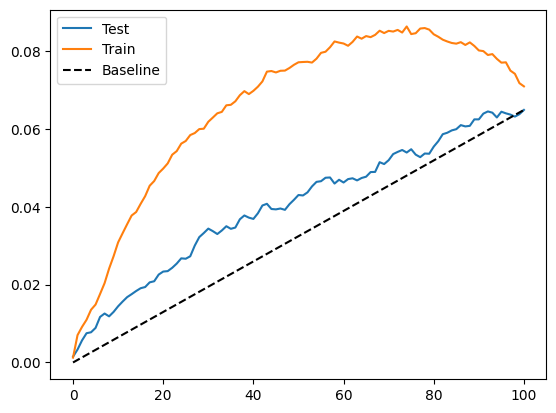

In [7]:
gain_curve_test = cumulative_gain(test_pred, "cate", y="converted", t="em1")
gain_curve_train = cumulative_gain(train.assign(cate=cate_learner.predict(train[X])), "cate", y="converted", t="em1")
plt.plot(gain_curve_test, color="C0", label="Test")
plt.plot(gain_curve_train, color="C1", label="Train")
plt.plot([0, 100], [0, elast(test, "converted", "em1")], linestyle="--", color="black", label="Baseline")
plt.legend();

우리가 얻은 `plug and play estimator`는 검증 데이터에서 무작위 모델보다 좋습니다. 하지만 훈련 데이터에서 성능이 훨씬 좋아 과적합이 된 것으로 보입니다.
 
과적합은 목표 변환의 큰 단점 중 하나입니다. 목표 변환은 기계학습으로 처치 효과를 직접 예측할 수 있어 단순하지만, 과적합 되기 쉽습니다. 목표 변환은 `ITE`에 대한 잡음 섞인 추정치로 잡음에 대한 분산은 테스트 데이터로 전달되지 않습니다. 과적합은 데이터가 많아질수록 개선되는 경향이 있습니다.

## The Continuous Treatment Case

![img](./data/img/plug-and-play-estimators/second-estimator.png)

목표 변환의 또다른 단점은 처치가 `discrete`(이산) 또는 `binary`(이진)일 때만 적용할 수 있다는 점입니다. `binary`는 학술연구에서 많이 다루는 문제입니다. 대부분의 연구는 이진 처치 사례로 진행되므로 연속형 처치에 관한 자료는 찾기 어렵습니다. 하지만 연속형 처치는 어디에나 있으며 실제로 해결해야 하는 문제입니다. 저는 연속형 처치를 위한 목표 변환에 대한 자료는 찾지 못했지만, 효과적인 방법을 생각해냈습니다. 다만 엄격하게 증명되지 않았으므로 조심히 사용해야 합니다.

아이스크림 판매 예시로 돌아가 보겠습니다. 목표는 매출을 최대화하기 위해 아이스크림 매출에 대한 가격 탄력성을 추정하는 것입니다. 사람들에게 아이스크림 가격에 덜 민감한 날을 알고 싶습니다. 이 데이터 세트는 가격이 무작위로 할당되었으므로 편향을 걱정하지 않아도 됩니다.

In [8]:
prices_rnd = pd.read_csv("./data/ice_cream_sales_rnd.csv")
prices_rnd.head()

temp  weekday  cost  price  sales
0  25.8        1   0.3      7    230
1  22.7        3   0.5      4    190
2  33.7        7   1.0      5    237
3  23.0        4   0.5      5    193
4  24.4        1   1.0      3    252

전체 데이터를 훈련 데이터와 테스트 데이터로 나누는 것부터 시작하겠습니다.

In [9]:
np.random.seed(123)
train, test = train_test_split(prices_rnd, test_size=0.3)
train.shape, test.shape

((3500, 5), (1500, 5))

이제 약간의 창의력이 필요합니다. 이산 처치에서 `CATE`는 `feature` $X$ 조건을 조건으로 하여 `untreated`에서 `treated` 상태로 바뀔 때 `outcome`의 변화량과 같습니다.

$
\tau(x) = E[Y_i(1) − Y_i(0)|X] = E[\tau_i|X]
$
 
쉽게 말하자면 개별 `unit`의 특성치인 $X$를 사용해 처치 효과를 추정합니다. 연속형 처치는 처치에 따라 상태를 나눌 수 없습니다. 개별 `unit`에 대해 처치를 적용하거나 적용하지 않는 상황이 아니며 모든 `unit`에 크기가 다른 처치가 적용되는 것과 같습니다. 따라서 처치의 크기에 따라 $Y$가 얼마나 바뀌는지 계산해야 합니다. 마치 $Y$를 $T$로 편미분 하는 것과 같습니다. 또한, $X$를 조건으로 하므로 그룹(`ATE`가 아닌 `CATE`)에 대한 추정치를 구하고자 합니다.

$
\tau(x) = E[\partial Y_i(t)|X] = E[\tau_i|X]
$
 
$\tau(x)$를 어떻게 얻을 수 있을까요? 우선 $T$와 $Y$가 선형인 쉬운 경우를 먼저 보겠습니다. 더운 날(노란색)과 추운 날(파란색)의 두 종류 날을 가정해보겠습니다. 사람들은 추운 날 가격에 민감하며 가격이 오를 때 수요가 선형적으로 감소합니다.
 
![img](./data/img/plug-and-play-estimators/linear-case.png)
 
`CATE`는 선의 기울기와 같습니다. 기울기는 가격을 올릴 때 판매량이 얼마나 줄어들지 알려줍니다. 날씨를 조건으로 (더운 날과 추운 날) 개별 그룹에 대해 선형 회귀로 탄력성을 추정할 수 있습니다.

$$
\hat{\tau(x)} = Cov(Y_i, T_i)/Var(T_i) = \dfrac{\sum(Y_i- \bar{Y})(T_i - \bar{T})}{\sum (T_i - \bar{T})^2}
$$
 
이 방법을 확장해 개별 `unit`에 대해 생각해봅시다. 만약 우리가 날짜를 정의한다면 어떨까요? 형태는 아래와 같을 것입니다.

$
Y^*_i = (Y_i- \bar{Y})\dfrac{(T_i - \bar{T})}{\sigma^2_T}
$
 
원래의 $Y$와 $T$에서 평균값을 빼고 분산으로 나눕니다. 이는 연속형 처치에 대한 목표 변환입니다.

![img](./data/img/plug-and-play-estimators/genious.jpeg)

이 변환이 효과 있을까요? 앞의 이진 사례처럼 효과를 확인해 봅시다. 
 
$
V_i = \dfrac{(T_i - \bar{T})}{\sigma^2_T}
$
 
$E[T_i|X_i=x]=\bar{T}$ 이며, $T$는 무작위 할당이므로 $E[V_i|X_i=x]=0$입니다. 즉, 모든 $X$에서 $E[T_i]=\bar{T}$ 입니다. 또한 $E[T_i(T_i - \bar{T})|X_i=x] = E[(T_i - \bar{T})^2|X_i=x]$ 이기 때문에 $E[T_i V_i | X_i=x]=1$입니다. 마지막으로 조건부 독립성(무작위 처치)에 따라 $E[T_i e_i | X_i=x] = E[T_i | X_i=x] E[e_i | X_i=x]$ 입니다. 

우리는 국소적인 선형 모델에 대한 모수를 추정하고 있습니다.

$
Y_i = \alpha + \beta T_i + e_i | X_i=x
$
 
예시에서는 더운 날과 추운 날에 대한 선형 모델입니다. 특히 `CATE`인 $\beta$에 관심이 있습니다. 수식을 정리하면 다음과 같습니다.

$
\begin{align}
E[Y^*_i|X_i=X] &= E[(Y_i-\bar{Y})V_i | X_i=x] \\
&= E[(\alpha + \beta T_i + e_i - \bar{Y})V_i | X_i=x] \\
&= \alpha E[V_i | X_i=x] + \beta E[T_i V_i | X_i=x] + E[e_i V_i | X_i=x] \\
&= \beta + E[e_i V_i | X_i=x] \\
&= \beta = \tau(x)
\end{align}
$
 
이 변환은 무작위 처치인 적용할 수 있음에 유의하세요. 비무작위 처치의 경우 $\bar{T}$를 $M(X_i)$로 대체해야 합니다. 여기서 $M$은 $E[T_i|X_i=x]$를 추정하는 모델입니다.
 
$
Y^*_i = (Y_i- \bar{Y})\dfrac{(T_i - M(T_i))}{(T_i - M(T_i))^2}
$
 
이렇게 하면 세 번째 줄의 $\alpha E[V_i | X_i=x]$ 항이 $0$으로 사라지고 $E[T_i V_i | X_i=x]$라는 항은 $1$이 됩니다. `ITE`를 원한다면 $E[T_i V_i | X_i=x]$가 $1$로 바뀌는 것이 필요하지 않습니다. 가격 인상에 더 민감한 날만 알고 싶고 그 크기는 필요 없다면 $\beta$의 크기는 문제 되지 않으므로 분모를 생략할 수 있습니다.

$
Y^*_i = (Y_i- \bar{Y})(T_i - M(T_i))
$
 
수식이 많았지만 걱정하지 마세요. 코드는 매우 간단합니다. 다시 한번 위 공식으로 목표 변환을 수행합니다. 여기서는 무작위 처치를 다루고 있으므로 가격 예측하는 모델이 필요 없으며, 내친김에 분모도 생략합시다. 처치 효과를 정렬하는 데만 관심이 있기 때문입니다.

In [10]:
y_star_cont = (train["price"] - train["price"].mean()
               *train["sales"] - train["sales"].mean())

기계학습 회귀 모델을 훈련해 예측값을 계산합니다.

In [11]:
cate_learner = LGBMRegressor(max_depth=3, min_child_samples=300, num_leaves=5)

np.random.seed(123)
cate_learner.fit(train[["temp", "weekday", "cost"]], y_star_cont)

cate_test_transf_y = cate_learner.predict(test[["temp", "weekday", "cost"]])

test_pred = test.assign(cate=cate_test_transf_y)
test_pred.sample(5)

temp  weekday  cost  price  sales         cate
2815  15.7        4   1.5      3    187 -1395.956278
257   29.4        3   1.0      3    209 -1607.400415
2585  24.6        6   1.0     10    197 -1497.197402
3260  20.2        1   0.5      4    246 -1629.798111
1999  10.0        4   0.5     10    139 -1333.690544

`CATE` 해석은 직관적이지 않습니다. 분모를 제거하여 `CATE`가 $Var(X)$만큼 커집니다. 어쨌든 처치 효과를 잘 정렬해야 하므로 누적 이득 곡선을 사용해 봅시다.

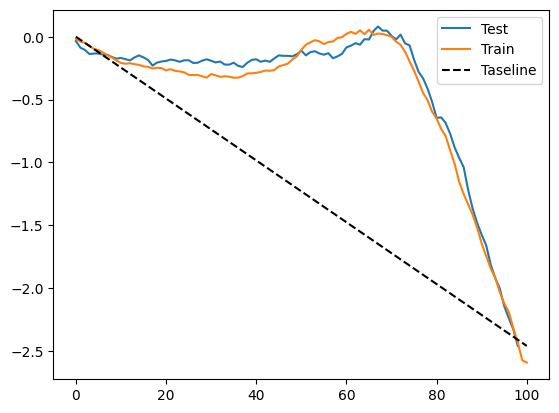

In [12]:
gain_curve_test = cumulative_gain(test.assign(cate=cate_test_transf_y),
                                "cate", y="sales", t="price")

gain_curve_train = cumulative_gain(train.assign(cate=cate_learner.predict(train[["temp", "weekday", "cost"]])),
                                   "cate", y="sales", t="price")


plt.plot(gain_curve_test, label="Test")
plt.plot(gain_curve_train, label="Train")
plt.plot([0, 100], [0, elast(test, "sales", "price")], linestyle="--", color="black", label="Taseline")
plt.legend();

누적 이득 곡선은 목표 변환 모델이 무작위 모델보다 훨씬 뛰어나며, 훈련 데이터와 테스트 데이터에서 상당히 유사한 결과를 보입니다. 아이스크림 데이터 특징상 결과가 좋을 수도 있습니다. 앞의 이메일 예제에서는 과적합 문제가 있었고 모델 성능도 그리 좋지 않았습니다.
 
### Non Linear Treatment Effects
 
연속형 처치 문제를 다루긴 했지만, 더 살펴볼 것이 남았습니다. 지금까지 처치 효과는 선형이라 가정했습니다. 이는 그다지 합리적인 가정이 아닙니다. 일반적으로 처치 효과는 어떤 형태로든 포화(saturation)합니다. 첫 번째 가격 인상에서는 판매량이 빨리 감소하지만, 그다음부터는 판매량 감소가 더딜 것으로 예상하는 것이 더 합리적입니다.
 
![img](./data/img/plug-and-play-estimators/non-linear-case.png)
 
문제는 **탄력성 혹은 처치 효과가 처치 자체에 따라 변한다는 것입니다**. 위 그림에서 처치 효과는 곡선의 시작 부분에서 크고 가격이 높을수록 작아집니다. 다시 말하지만, 더운 날(노란색)과 추운 날(파란색)의 두 가지 유형의 날이 있다고 가정하고 인과 모델로 이를 구분하고자 합니다. 인과 모델은 각각의 탄력성을 예측해야 하는데 비선형일 경우 서로 다른 가격대(오른쪽 이미지)에서 탄력성이 같을 수 있습니다.
 
이 문제를 쉽게 해결할 방법은 없어 보이며 저 또한 여전히 효과적인 방법을 찾고 있습니다. 지금은 처치의 형태를 어떻게든 선형화하려고 노력하고 있습니다. 예를 들어 수요는 일반적으로 아래와 같은 함수를 가지는데, $\alpha$가 높으면 더 빠르게 하락한다는 것을 의미합니다.
 
$
D_i = \dfrac{1}{P_i^{\alpha}}
$

수요 $Y$와 가격 $T$에 모두 로그를 적용하면 선형 식을 얻습니다.

$
\begin{align}
log(D)_i &= log\bigg(\dfrac{1}{P_i^{\alpha}}\bigg) \\
&= log(1) - log(P_i^{\alpha}) \\
&= log(1) - log(P_i^{\alpha}) \\
&= - \alpha * log(P_i) \\
\end{align}
$
 
선형화는 배경지식이 필요해 쉽지는 않습니다. 무언가를 시도해보고 잘 맞는 방법을 찾아봐야 합니다. 종종 로그나 제곱근과 같은 비선형 함수가 도움이 됩니다.
 
## Key Ideas

우리는 기계학습 모델로 `CATE`를 추정하는 방향으로 나아가고 있습니다. 기계학습을 적용할 때 어려운 점은 예측 모델을 인과 효과 추정 목적으로 사용하려 한다는 것입니다. 예측 모델은 $X$로 $Y$를 예측하려는 반면 ($Y = M(X, T)$) 반면, 인과 모델은 $Y$에 대한 $T$의 편미분 $\partial Y = \partial M(X, T) $를 추정해야합니다. 가능한 모든 $Y$를 측정할 수 없으므로 개별 `unit` 수준에서 $\partial Y$를 알 수 없으므로 결코 쉬운 문제는 아닙니다. 따라서 모델의 목표를 설계할 때 창의력이 필요합니다.
 
20장에서는 목표 변환에 대한 간단한 기술을 배웠습니다. 목표 변환은 원래 목표 $Y$에 $T$를 결합해 `CATE`를 예측할 수 있게 만들어 줍니다. 따라서 `CATE`를 추정하는 기계학습 모델을 얻을 수 있습니다. 참고로 이 방법은 **F-Learner**라고도 불립니다.
 
목표 변환의 가장 큰 단점은 과적합입니다. 변환된 목표는 개별 처치 효과의 잡음 섞인 추정치로 잡음은 분산의 형태로 모델에 전달됩니다. 따라서 데이터가 많이 확보되어 있을 때 사용이 가능한 방법입니다. 또 다른 단점은 이진(이산) 처치 문제에만 적용할 수 있다는 것입니다. 저는 목표 변환을 연속형 처치 문제에 적용할 수 있도록 노력했고 결국 효과가 있는 것처럼 보이는 방법을 찾아냈습니다. 하지만 아직 이를 뒷받침할 이론적 근거는 없습니다.
 
마지막으로 비선형 처치 효과와 관련된 문제를 살펴보았습니다. 처치 효과는 처치 차체에 의한 영향을 받을 수 있어 해석에 유의해야 합니다.

## References 
 
The things I've written here are mostly stuff from my head. I've learned them through experience. This means that they have **not** passed the academic scrutiny that good science often goes through. Instead, notice how I'm talking about things that work in practice, but I don't spend too much time explaining why that is the case. It's a sort of science from the streets, if you will. However, I am putting this up for public scrutiny, so, by all means, if you find something preposterous, open an issue and I'll address it to the best of my efforts.
 
Most of this chapter draws from Susan Atheys' and Guido W. Imbens' paper, *Machine Learning Methods for Estimating Heterogeneous Causal Effects*. Some material about target transformation can also be found on Pierre Gutierrez' and Jean-Yves G´erardy's paper, *Causal Inference and Uplift Modeling: A review of the literature*. Note that these papers only cover the binary treatment case. Another review of causal models for CATE estimation that references the F-Learner is *Meta-learners for Estimating Heterogeneous Treatment Effects using Machine Learning*, by K¨unzel et al, 2019. 

 
## Contribute
 
Causal Inference for the Brave and True is an open-source material on causal inference, the statistics of science. It uses only free software, based in Python. Its goal is to be accessible monetarily and intellectually.
If you found this book valuable and you want to support it, please go to [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). If you are not ready to contribute financially, you can also help by fixing typos, suggesting edits or giving feedback on passages you didn't understand. Just go to the book's repository and [open an issue](https://github.com/matheusfacure/python-causality-handbook/issues). Finally, if you liked this content, please share it with others who might find it useful and give it a [star on GitHub](https://github.com/matheusfacure/python-causality-handbook/stargazers).